In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
companies = pd.read_csv('Companies.csv')
companies.head()

,Rank,Forbes 2000 rank,Name,Headquarters,Revenue(billions US$),Profit(billions US$),Assets(billions US$),Value(billions US$),Industry
0,1,79,Stellantis,Amsterdam,176.61,16.78,195.33,44.26,Automotive
1,2,112,Airbus,Leiden,61.64,4.98,129.16,88.60,Aerospace and defense
2,3,183,ING Group,Amsterdam,21.49,5.65,"1,081.81",39.03,Banking
3,4,280,ASML Holding,Veldhoven,20.65,6.09,33.64,247.80,Electronics
4,5,288,Ahold Delhaize,Zaandam,89.36,2.66,51.98,30.57,Retail


In [3]:
companies.shape

(20, 9)

In [4]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rank                   20 non-null     int64  
 1   Forbes 2000 rank       20 non-null     int64  
 2   Name                   20 non-null     object 
 3   Headquarters           20 non-null     object 
 4   Revenue(billions US$)  20 non-null     float64
 5   Profit(billions US$)   20 non-null     float64
 6   Assets(billions US$)   20 non-null     object 
 7   Value(billions US$)    20 non-null     float64
 8   Industry               20 non-null     object 
dtypes: float64(3), int64(2), object(4)
memory usage: 1.5+ KB


In [5]:
companies['Assets(billions US$)'].unique()

array(['195.33', '129.16', '1,081.81', '33.64', '51.98', '285.02',
       '56.66', '509.34', '35.45', '21.25', '18.21', '25.73', '84.86',
       '13.89', '25.00', '17.41', '12.76', '14.48', '3.33', '15.92'],
      dtype=object)

In [6]:
companies['Assets(billions US$)'] = companies['Assets(billions US$)'].str.replace(',', '').astype(float)


In [7]:
companies.dtypes

Rank                       int64
Forbes 2000 rank           int64
Name                      object
Headquarters              object
Revenue(billions US$)    float64
Profit(billions US$)     float64
Assets(billions US$)     float64
Value(billions US$)      float64
Industry                  object
dtype: object

In [8]:
#check for null values
companies.isnull().sum()

Rank                     0
Forbes 2000 rank         0
Name                     0
Headquarters             0
Revenue(billions US$)    0
Profit(billions US$)     0
Assets(billions US$)     0
Value(billions US$)      0
Industry                 0
dtype: int64

In [9]:
companies.duplicated().sum()

0

In [10]:
companies.describe()

,Rank,Forbes 2000 rank,Revenue(billions US$),Profit(billions US$),Assets(billions US$),Value(billions US$)
count,20.00000,20.000000,20.000000,20.000000,20.00000,20.000000
mean,10.50000,741.650000,29.119500,3.213500,131.56150,36.984500
std,5.91608,543.728868,40.323638,3.656723,255.29644,53.399889
min,1.00000,79.000000,2.150000,0.590000,3.33000,1.040000
25%,5.75000,324.000000,9.707500,1.012500,17.03750,13.947500
50%,10.50000,700.000000,16.000000,1.960000,29.68500,20.000000
75%,15.25000,1061.000000,26.030000,4.185000,95.93500,40.337500
max,20.00000,1964.000000,176.610000,16.780000,1081.81000,247.800000


In [11]:
companies['Industry'].unique()

array(['Automotive', 'Aerospace and defense', 'Banking', 'Electronics',
       'Retail', 'Insurance', 'Beverages', 'Conglomerate', 'Chemicals',
       'Finance', 'Music', 'Consulting', 'Telecommunication'],
      dtype=object)

In [12]:
companies['Name'].unique()

array(['Stellantis', 'Airbus', 'ING Group', 'ASML Holding',
       'Ahold Delhaize', 'NN Group', 'Heineken N.V.', 'Aegon N.V.',
       'Philips', 'NXP Semiconductors', 'DSM', 'HAL Investments\xa0[nl]',
       'ASR Nederland', 'Universal Music', "JDE Peet's", 'AkzoNobel',
       'Randstad Holding', 'KPN', 'ASM International', 'VEON'],
      dtype=object)

In [13]:
companies['Name'] = companies['Name'].str.replace('HAL Investments\xa0[nl]', 'HAL Investments',regex=True )
companies["Name"]

0               Stellantis
1                   Airbus
2                ING Group
3             ASML Holding
4           Ahold Delhaize
5                 NN Group
6            Heineken N.V.
7               Aegon N.V.
8                  Philips
9       NXP Semiconductors
10                     DSM
11    HAL Investments [nl]
12           ASR Nederland
13         Universal Music
14              JDE Peet's
15               AkzoNobel
16        Randstad Holding
17                     KPN
18       ASM International
19                    VEON
Name: Name, dtype: object

In [14]:
companies

,Rank,Forbes 2000 rank,Name,Headquarters,Revenue(billions US$),Profit(billions US$),Assets(billions US$),Value(billions US$),Industry
0,1,79,Stellantis,Amsterdam,176.61,16.78,195.33,44.26,Automotive
1,2,112,Airbus,Leiden,61.64,4.98,129.16,88.60,Aerospace and defense
2,3,183,ING Group,Amsterdam,21.49,5.65,1081.81,39.03,Banking
3,4,280,ASML Holding,Veldhoven,20.65,6.09,33.64,247.80,Electronics
4,5,288,Ahold Delhaize,Zaandam,89.36,2.66,51.98,30.57,Retail
5,6,336,NN Group,The Hague,22.38,3.80,285.02,15.72,Insurance
6,7,409,Heineken N.V.,Amsterdam,25.93,1.97,56.66,23.41,Beverages
7,8,418,Aegon N.V.,The Hague,26.33,1.95,509.34,11.76,Insurance
8,9,424,Philips,Eindhoven,20.28,3.92,35.45,26.39,Conglomerate
9,10,656,NXP Semiconductors,Eindhoven,11.06,1.87,21.25,44.83,Electronics


In [15]:
companies['Industry'] = companies['Industry'].str.replace('Conglomerate', 'Electronics' )
companies["Industry"]

0                Automotive
1     Aerospace and defense
2                   Banking
3               Electronics
4                    Retail
5                 Insurance
6                 Beverages
7                 Insurance
8               Electronics
9               Electronics
10                Chemicals
11                  Finance
12                Insurance
13                    Music
14                Beverages
15                Chemicals
16               Consulting
17        Telecommunication
18              Electronics
19        Telecommunication
Name: Industry, dtype: object

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


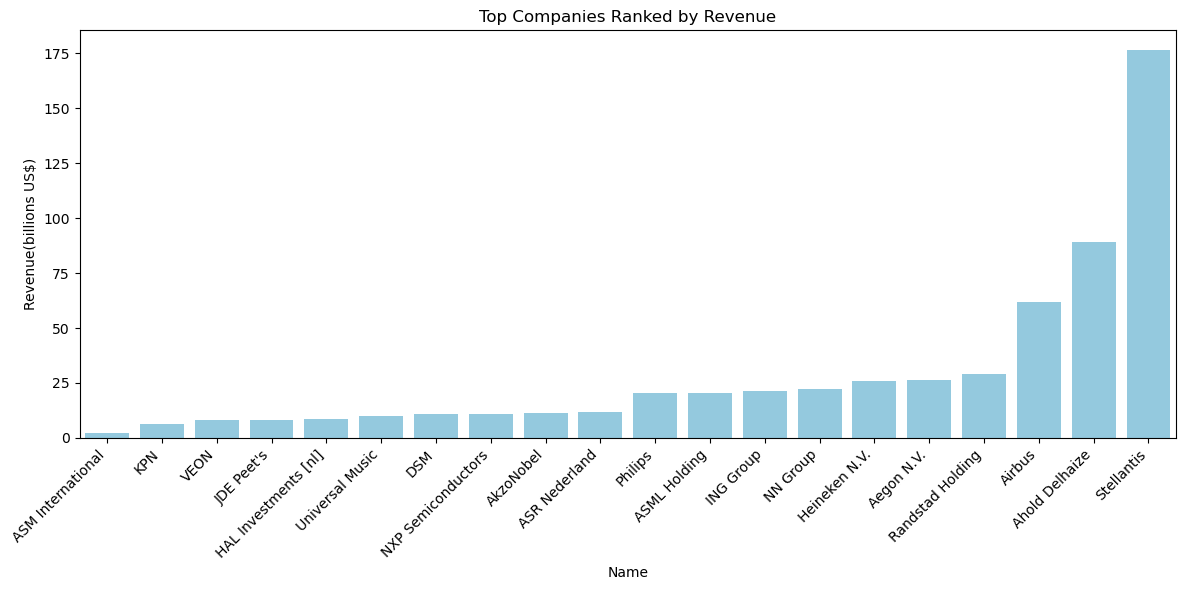

In [16]:

companies_sorted = companies.sort_values(by='Revenue(billions US$)')
plt.figure(figsize=(12, 6))
sns.barplot(x='Name', y='Revenue(billions US$)', data=companies_sorted, color='skyblue')
plt.title('Top Companies Ranked by Revenue')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()


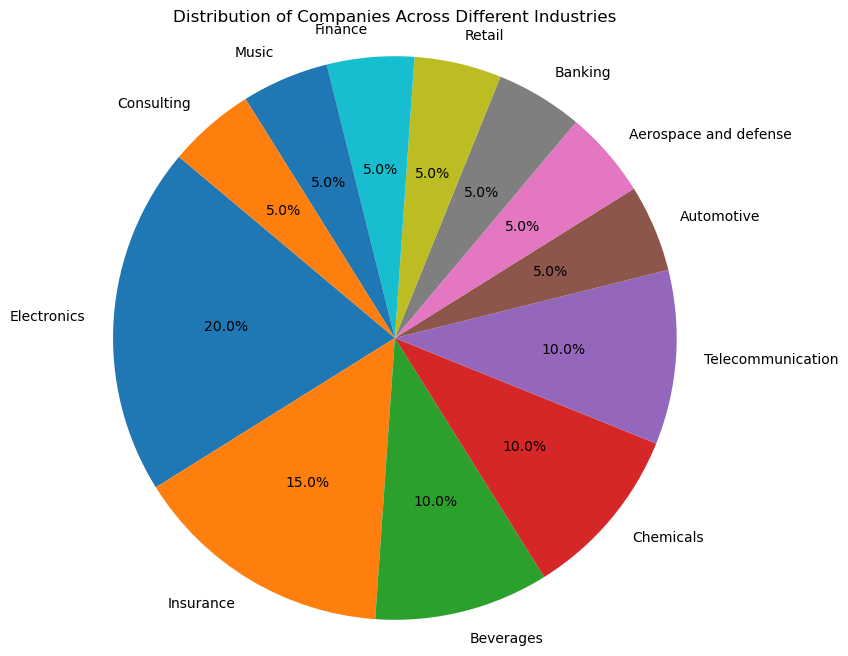

In [17]:
industry_counts = companies['Industry'].value_counts()

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(industry_counts, labels=industry_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Companies Across Different Industries')
plt.axis('equal')  
plt.show()

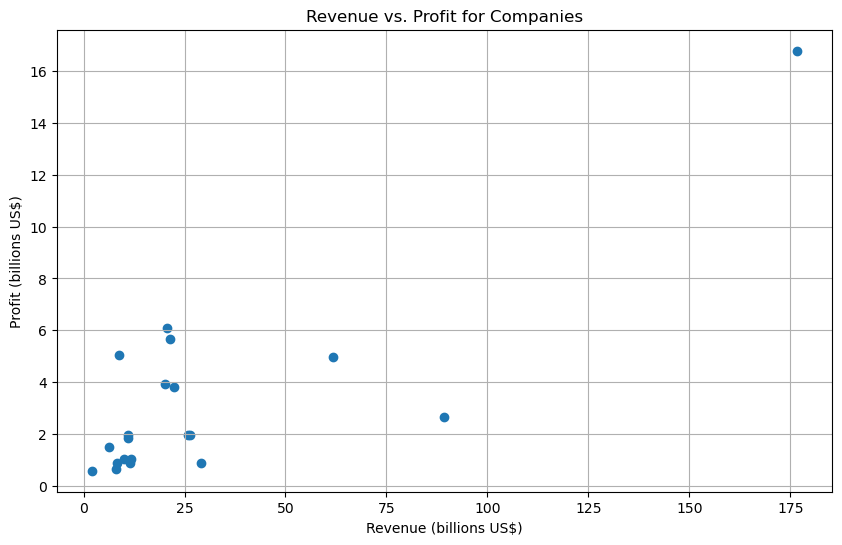

In [18]:
#Scatter plot
x = companies['Revenue(billions US$)']
y = companies['Profit(billions US$)']

plt.figure(figsize=(10, 6))
plt.scatter(x, y)
plt.xlabel('Revenue (billions US$)')
plt.ylabel('Profit (billions US$)')
plt.title('Revenue vs. Profit for Companies')
plt.grid(True)  
plt.show()

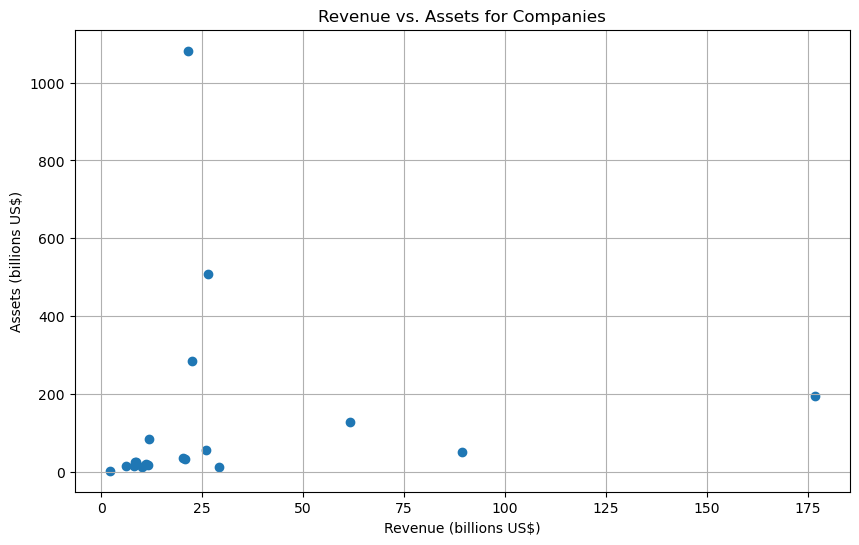

In [19]:
#Scatter plot
x = companies['Revenue(billions US$)']
y = companies['Assets(billions US$)']

plt.figure(figsize=(10, 6))
plt.scatter(x, y)
plt.xlabel('Revenue (billions US$)')
plt.ylabel('Assets (billions US$)')
plt.title('Revenue vs. Assets for Companies')
plt.grid(True)  
plt.show()

<Axes: >

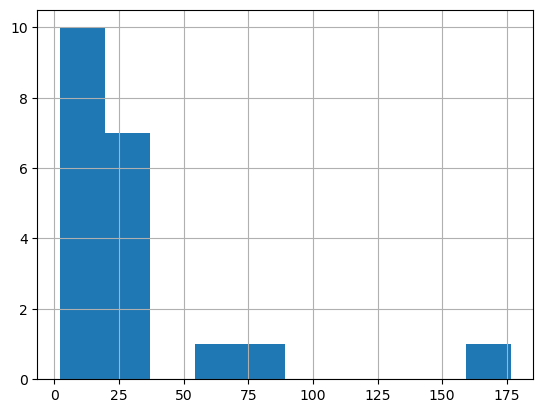

In [20]:
#histogram showing the distribution of revenue among the companies
companies['Revenue(billions US$)'].hist()

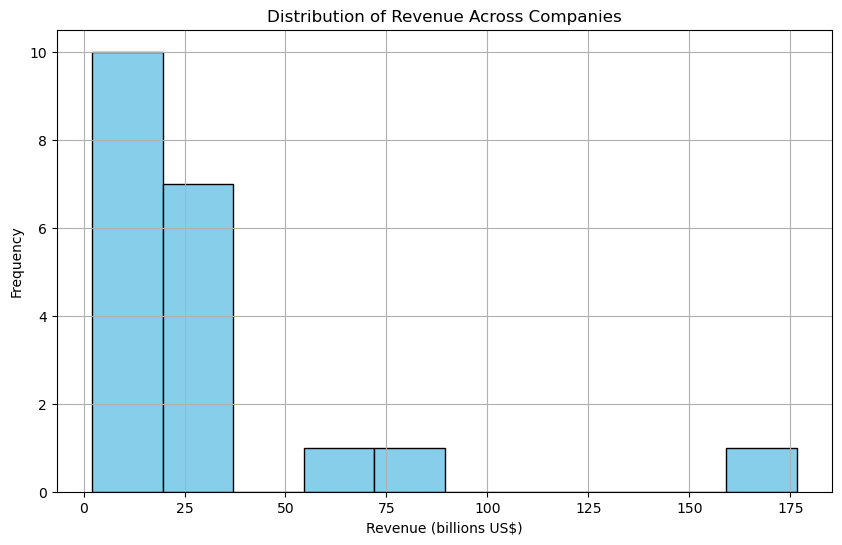

In [21]:
plt.figure(figsize=(10, 6))
plt.hist(companies['Revenue(billions US$)'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Revenue (billions US$)')
plt.ylabel('Frequency')
plt.title('Distribution of Revenue Across Companies')
plt.grid(True)
plt.show()

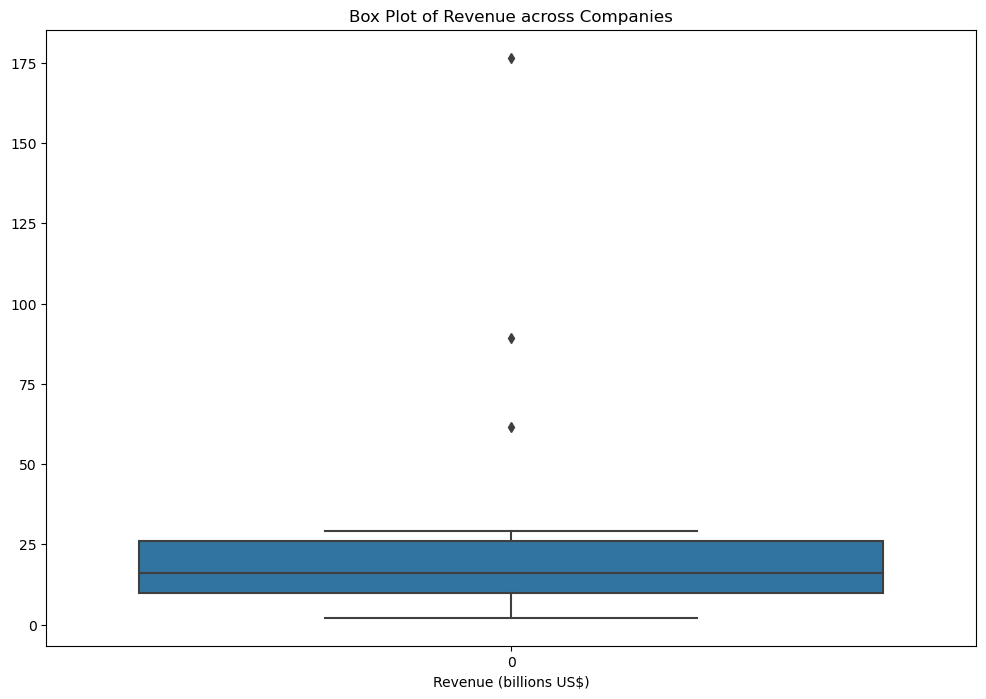

In [22]:
plt.figure(figsize=(12, 8)) 
sns.boxplot(data=companies['Revenue(billions US$)'])

plt.title('Box Plot of Revenue across Companies')
plt.xlabel('Revenue (billions US$)')

plt.show()

In [23]:
''' An outlier has been detected but it shall not be removed'''

' An outlier has been detected but it shall not be removed'

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


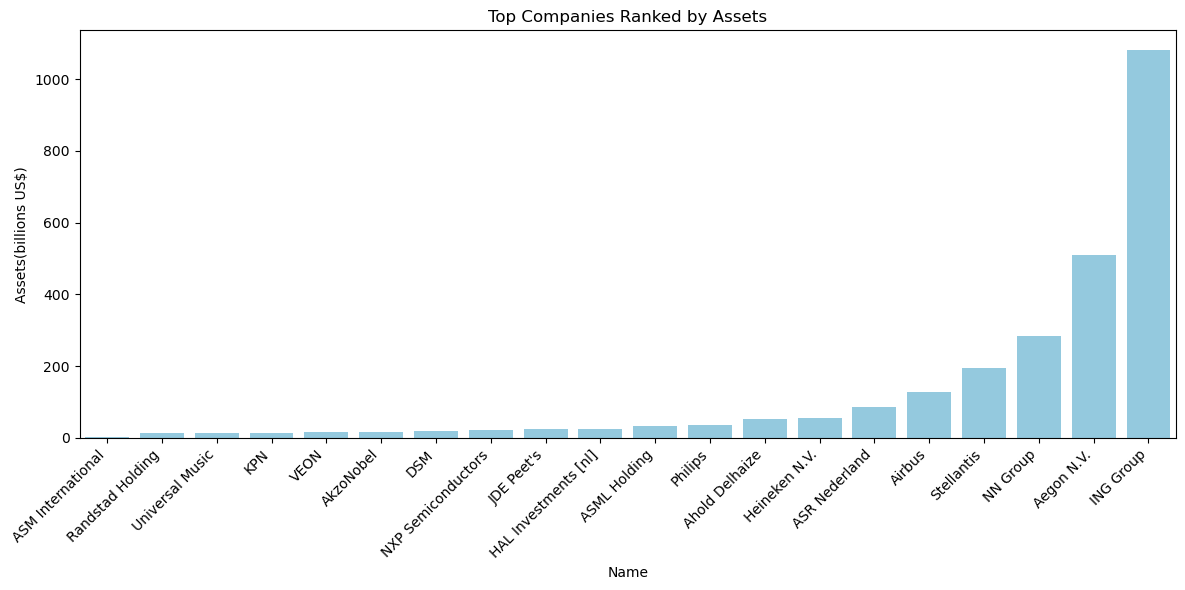

In [24]:
#bar chart showing the top companies ranked by assets.

companies_sorted = companies.sort_values(by='Assets(billions US$)')

plt.figure(figsize=(12, 6))
sns.barplot(x='Name', y='Assets(billions US$)', data=companies_sorted, color='skyblue')
plt.title('Top Companies Ranked by Assets')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()


In [26]:
correlation_matrix = companies[['Revenue(billions US$)', 'Profit(billions US$)', 'Assets(billions US$)']].corr()

display(correlation_matrix)

,Revenue(billions US$),Profit(billions US$),Assets(billions US$)
Revenue(billions US$),1.000000,0.828010,0.098156
Profit(billions US$),0.828010,1.000000,0.261698
Assets(billions US$),0.098156,0.261698,1.000000
